<a href="https://colab.research.google.com/github/TejasAdsul/ML_Classification/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the dataset, print head() to get a first look, print shape attribute to find number of rows and columns, 
# print columns attribute to get the names of all the columns
df = pd.read_csv('/content/sample_data/train.csv')
print(df.head(),'\n')
print(df.info(),'\n')
print(df.columns)

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null

In [ ]:
# Remove unimportant columns
df_req = df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
print(df_req.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [ ]:
# Remove or replace rows containing NaNs as applicable
df_req.Embarked.fillna(df_req.Embarked.value_counts().idxmax(),inplace=True)
df_req.Age.fillna(df_req.Age.median(),inplace=True)
df_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# Change object columns to category type wherever applicable
print(df_req.nunique(),'\n')
cols = [1,2,7]
for col in cols:
  df_req.iloc[:,col] = df_req.iloc[:,col].astype('category')
print(df_req.dtypes)

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64 

Survived       int64
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object


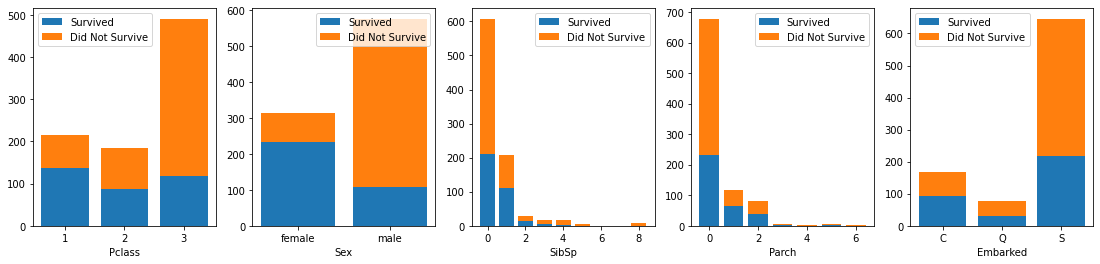

In [ ]:
# Plot countplots of columns to see how many people are in each category and what proportion survived
fig,ax = plt.subplots(1,5,figsize=(19,4))
cols = ['Pclass','Sex','SibSp','Parch','Embarked']
for idx,col in enumerate(cols):
  sum = df_req.groupby(col)['Survived'].sum()
  count = df_req.groupby(col)['Survived'].count()
  x = sum.reset_index()[col]
  h = np.array(sum)
  b = np.array(count)
  ax[idx].bar(x=x,height=h,label='Survived')
  ax[idx].bar(x=x,height=b-h,bottom=h,label='Did Not Survive')
  ax[idx].set_xlabel(col)
  ax[idx].legend()
plt.show()

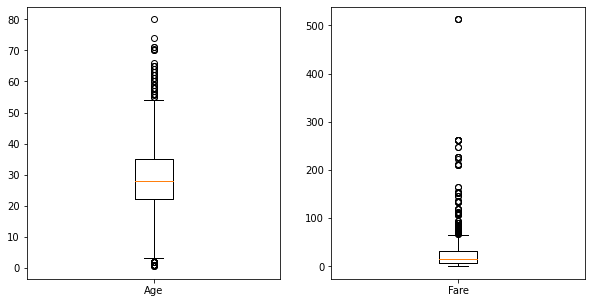

In [ ]:
# Plot age and fare to understand their statistics
fix,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].boxplot(df_req['Age'])
ax[0].set_xticklabels(['Age'])
ax[1].boxplot(df_req['Fare'])
ax[1].set_xticklabels(['Fare'])
plt.show()

In [ ]:
# Find mean age and mean fare by class and sex, and what percentage survived in each
print(df_req.groupby(['Pclass','Sex'])[['Age','Fare','Survived']].agg({'Age':'mean','Fare':'mean','Survived':'mean'}))

                     Age        Fare  Survived
Pclass Sex                                    
1      female  33.978723  106.125798  0.968085
       male    38.995246   67.226127  0.368852
2      female  28.703947   21.970121  0.921053
       male    30.512315   19.741782  0.157407
3      female  23.572917   16.118810  0.500000
       male    26.911873   12.661633  0.135447


In [ ]:
# Merge siblings, parents, children into one column
df_req['family'] = df_req['SibSp'] + df_req['Parch']
dr_req.drop(['SibSp','Parch'],axis=1,inplace=True)

NameError: ignored